## Thyroid cancer prediction


In [1]:
import pandas as pd
df=pd.read_csv("filtered_thyroid_data.csv")
df.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [2]:
df.tail()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [3]:
df.isnull().sum()

Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


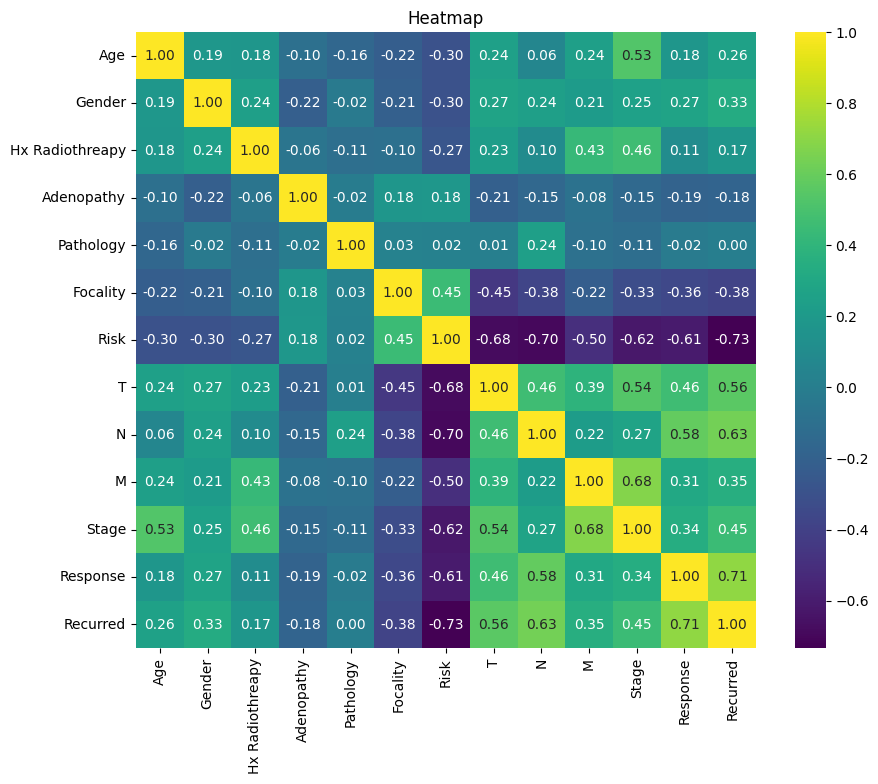

In [7]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True,fmt=".2f")
plt.title("Heatmap")
plt.show()


In [ ]:
df.columns

Index(['Age', 'Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('filtered_thyroid_data.csv')
df = df.dropna()
categorical_cols = df.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
X = df.drop('Recurred', axis=1)
y = df['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
num_cols = ['Age']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


xgb = XGBClassifier(scale_pos_weight=sum(y_train==0)/sum(y_train==1), random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("\nXGBoost Performance:")
print(classification_report(y_test, xgb_pred))
print("\nROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\nNeural Network:", classification_report(y_test, y_pred_mlp))
print("\nROC AUC:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN:", classification_report(y_test, y_pred_knn))
print("\nROC AUC:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree:", classification_report(y_test, y_pred_dt))
print("\nROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

ROC AUC: 0.9891107078039928

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77


ROC AUC: 0.9963702359346642

Neural Network:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   ma

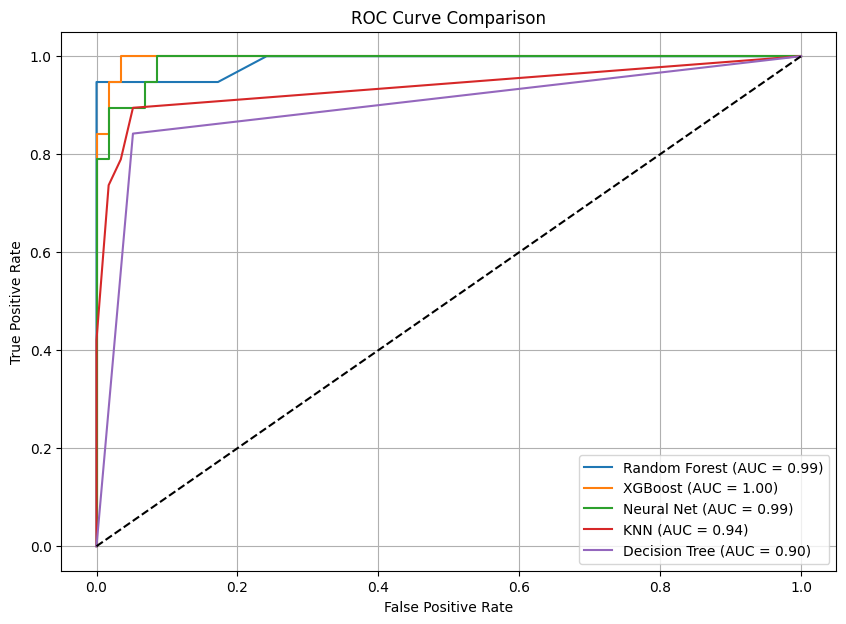

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Neural Net': mlp,
    'KNN': knn,
    'Decision Tree': dt
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


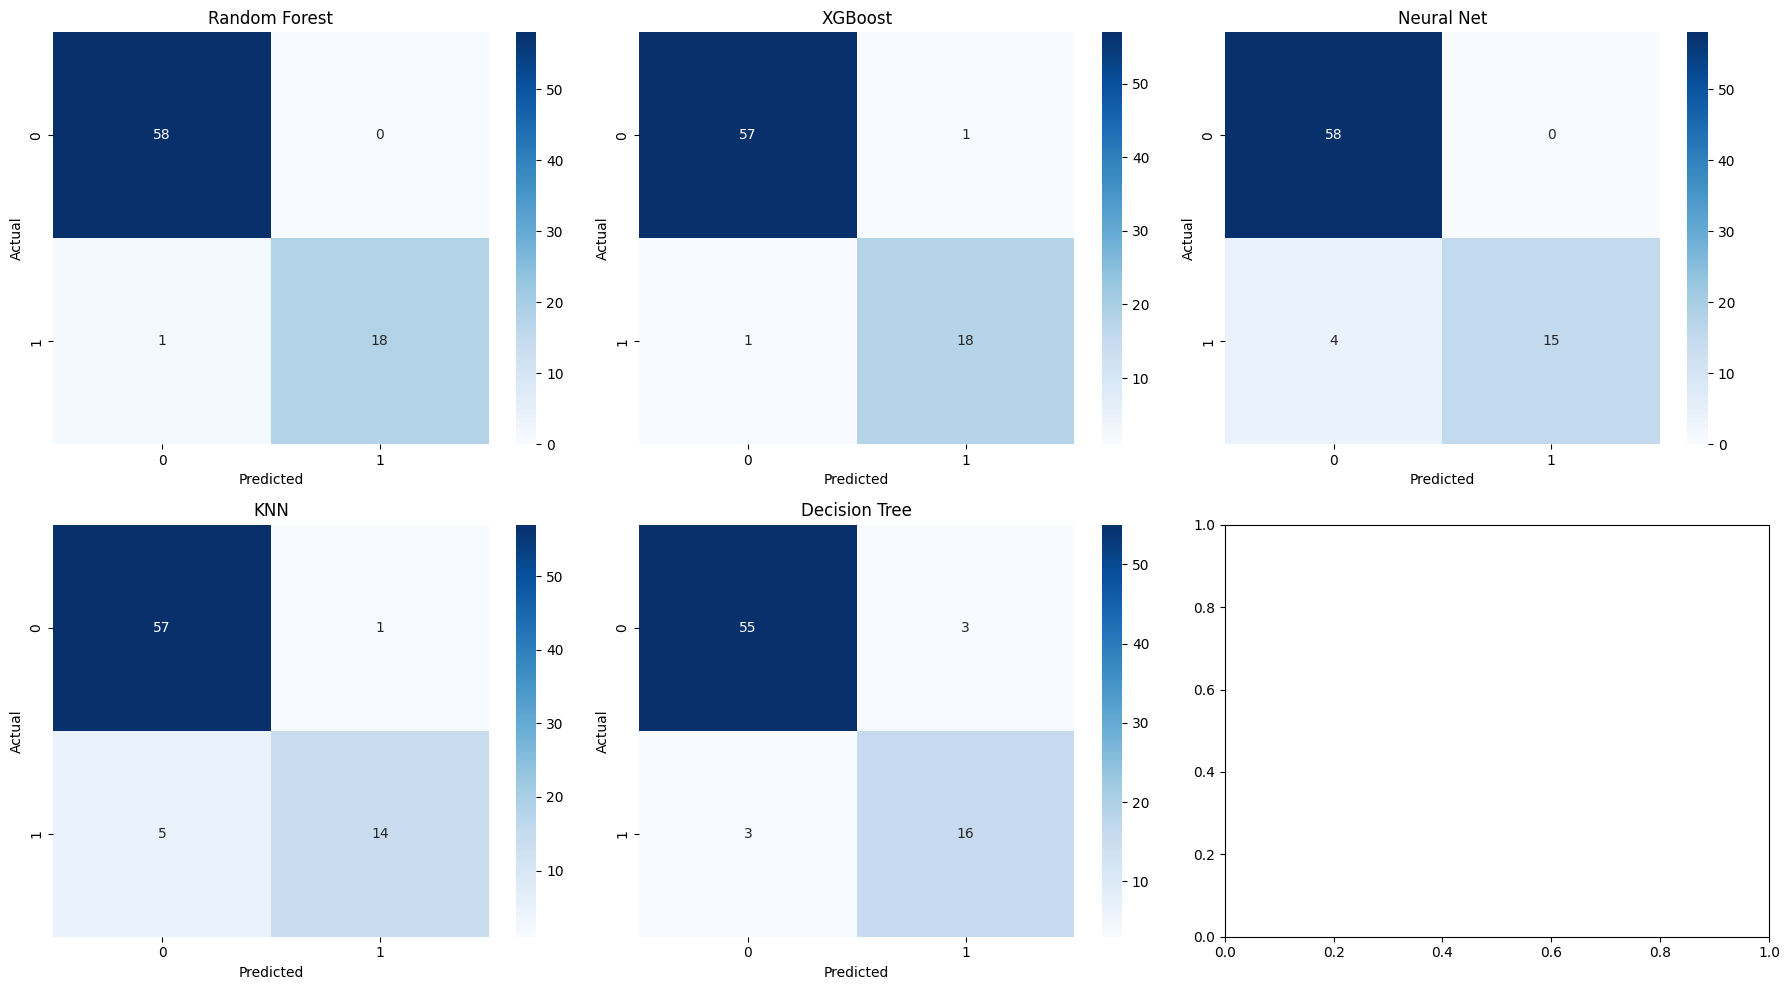

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, (name, model) in zip(axes.flatten(), models.items()):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


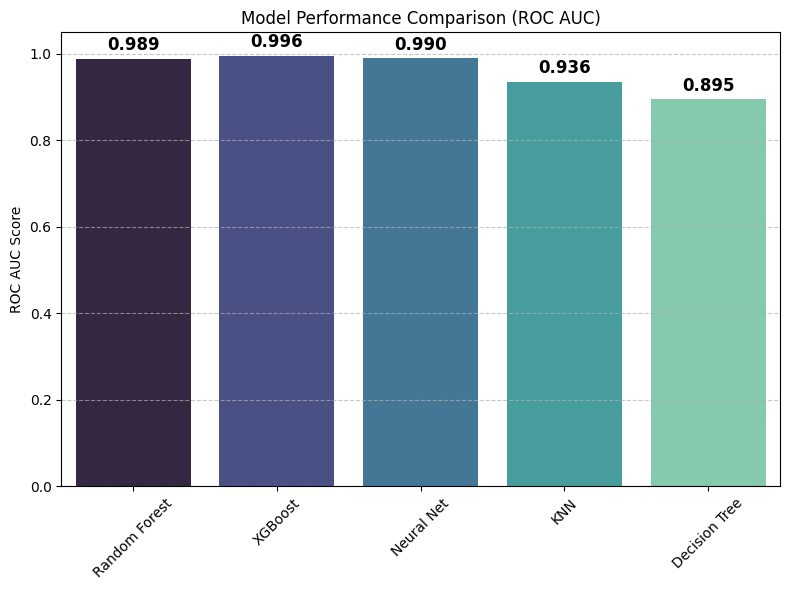

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

roc_scores = {
    name: roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    for name, model in models.items()
}


plt.figure(figsize=(8, 6))
sns.barplot(x=list(roc_scores.keys()), y=list(roc_scores.values()), palette='mako')

for i, (name, score) in enumerate(roc_scores.items()):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel("ROC AUC Score")
plt.title("Model Performance Comparison (ROC AUC)")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
